In [1]:
import numpy as np
from matplotlib import pyplot

In [2]:
from scipy.spatial.distance import cdist

def mahalanobis_distance(x, y):
    #X = np.vstack([x,y])
    #V = np.cov(X.T)
    #return np.sqrt(np.sum(np.dot(x - y, np.linalg.inv(V)) * (x - y), axis = 1))
    return cdist(x, y, metric = "mahalanobis")

In [3]:
fuzzifier = 1.01

def calculate_eta(assignation, distance):
    u = assignation ** fuzzifier
    d_squared = distance ** 2
    return np.sum(np.dot(u, d_squared.T)) / np.sum(u)

In [4]:
def calculate_u(x, v, eta):
    d = mahalanobis_distance(x.T, v).T
    u = 1.0 / (1.0 + (d / eta) ** (2.0 / fuzzifier - 1.0))
    return u, d

In [5]:
def cluster(x, groups, centers, precision, max_iterations):
    features, points = x.shape
    eta = 1.0
    v = np.zeros((max_iterations, groups, features))
    v[0] = np.array(centers)
    u = np.random.random((max_iterations, groups, points))
    
    i = 0
    while i < max_iterations - 1:
        u[i], distance = calculate_u(x, v[i], eta)
        v[i + 1] = calculate_new_centers(x, u[i])
        eta = calculate_eta(u[i], distance)
        if np.linalg.norm(v[i + 1] - v[i]) < precision:
            break
        i += 1
    plot(x, v[i], u[i - 1], groups)


def calculate_new_centers(x, u):
    u_temp = u ** fuzzifier
    return u_temp.dot(x.T) / np.atleast_2d(u_temp.sum(axis=1)).T
    
    
def plot(data, centers, assignation, groups):
    fig, ax = pyplot.subplots()
    group_num = np.argmax(assignation, axis = 0)
    for group in range(groups):
        ax.scatter(data[0][group_num == group], data[1][group_num == group])
    for center in centers:
        ax.scatter(center[0], center[1], c = 'black')      
    pyplot.show()

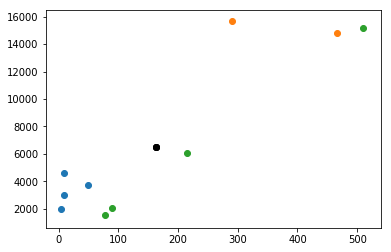

In [6]:
# Performance test on the Aircraft dataset

groups = 3
data = (np.array([(4.0,1940),(9,2960),(9,4630),(78,1528),(90,2040),(50,3700),(467,14815),(509,15200),(290,15700),(215,6045)])).T
initial_centers = (data.T)[np.random.choice((data.T).shape[0], groups), :]
cluster(data, groups, initial_centers, 1e-6, 10)

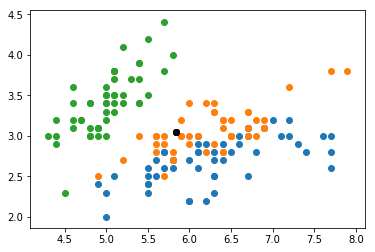

In [7]:
# Performance test on the famous iris dataset

from sklearn.datasets import load_iris

dataset = load_iris()
groups = 3
data = (np.array(dataset.data)).T
initial_centers = (data.T)[np.random.choice((data.T).shape[0], groups, replace=False), :]
cluster(data, groups, initial_centers, 1e-6, 10)